## Installation

In [ ]:
!sudo apt-get install git-lfs #or `brew install git-lfs` on mac

In [8]:
!git lfs install

Git LFS initialized.


In [9]:
!git clone https://huggingface.co/nvidia/nemotron-table-structure-v1

Cloning into 'nemotron-table-structure-v1'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 129 (delta 53), reused 0 (delta 0), pack-reused 3 (from 1)
Receiving objects: 100% (129/129), 80.45 KiB | 455.00 KiB/s, done.
Resolving deltas: 100% (53/53), done.
Filtering content: 100% (5/5), 828.99 MiB | 5.27 MiB/s, done.


In [12]:
!cd nemotron-table-structure-v1 && pip install -e . --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/init/Documents/s_code/GPU_Instance/all_huggingface/table_detection/nemotron-table-structure-v1
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for nemotron-table-structure-v1 (pyproject.toml) ... done
  Created wheel for nemotron-table-structure-v1: filename=nemotron_table_structure_v1-1.0.0-0.editable-py3-none-any.whl size=9333 sha256=c8be4adf5af4058c1597540f09ce77e90489bf308e12926619c48badb3c7a555
  Stored in directory: /tmp/pip-ephem-wheel-cache-3e523cgv/wheels/cf/aa/8f/770455de4d1ecaef89a46a7eddfafff3725fc13a76005c29be
Successfully built nemotron-table-structure-v1
  Attempting uninstall: nemotron-table-structure-v1
    Found existing installation: nemotron-table-structure-v1 1.0.0
    Uninstalling nemotro

Create a .ipyn file inside `nemotron-table-structure-v1`

## Run Model

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [5]:

from nemotron_table_structure_v1.model import define_model
from nemotron_table_structure_v1.utils import plot_sample, postprocess_preds_table_structure, reformat_for_plotting

### Change model package files:

In [6]:
model = define_model("nemotron_table_structure_v1")

 -> Loading weights from weights.pth


In [12]:
import io
import fitz
import numpy as np

pdf_file = "table.pdf"  # Path to your PDF file
doc = fitz.open(pdf_file)

page_number = 0
page = doc.load_page(page_number)

pix = page.get_pixmap()
img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

img = np.array(img)  
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [13]:
with torch.inference_mode():
    x = model.preprocess(img)
    preds = model(x, img.shape)[0]

In [ ]:
boxes, labels, scores = postprocess_preds_table_structure(preds, model.threshold, model.labels)

In [16]:
boxes, labels, scores

(array([[0.04880103, 0.10688373, 0.9241309 , 0.18184538],
        [0.26305935, 0.18169937, 0.38260236, 0.24613245],
        [0.63247514, 0.18152949, 0.88893753, 0.2160043 ],
        [0.13585302, 0.18200622, 0.26305333, 0.25248986],
        [0.3830889 , 0.18276857, 0.49831825, 0.25345808],
        [0.49843353, 0.18271537, 0.6300443 , 0.2721449 ],
        [0.62949663, 0.21582901, 0.7489778 , 0.2505916 ],
        [0.75050724, 0.2154973 , 0.89146215, 0.23739628],
        [0.7502078 , 0.22586805, 0.89178145, 0.2710842 ],
        [0.26332542, 0.24442089, 0.38298818, 0.2719956 ],
        [0.13629933, 0.25263208, 0.26325446, 0.27196795],
        [0.5037744 , 0.25697318, 0.627823  , 0.97430456],
        [0.13627589, 0.271459  , 0.26396534, 0.3044013 ],
        [0.26344568, 0.27169314, 0.3828622 , 0.3044851 ],
        [0.38235444, 0.2714625 , 0.4980771 , 0.30426854],
        [0.49880698, 0.27146655, 0.6313957 , 0.30450845],
        [0.6310865 , 0.27144605, 0.74878675, 0.3042937 ],
        [0.749

In [17]:
boxes_plot, confs = reformat_for_plotting(boxes, labels, scores, img.shape, model.num_classes)

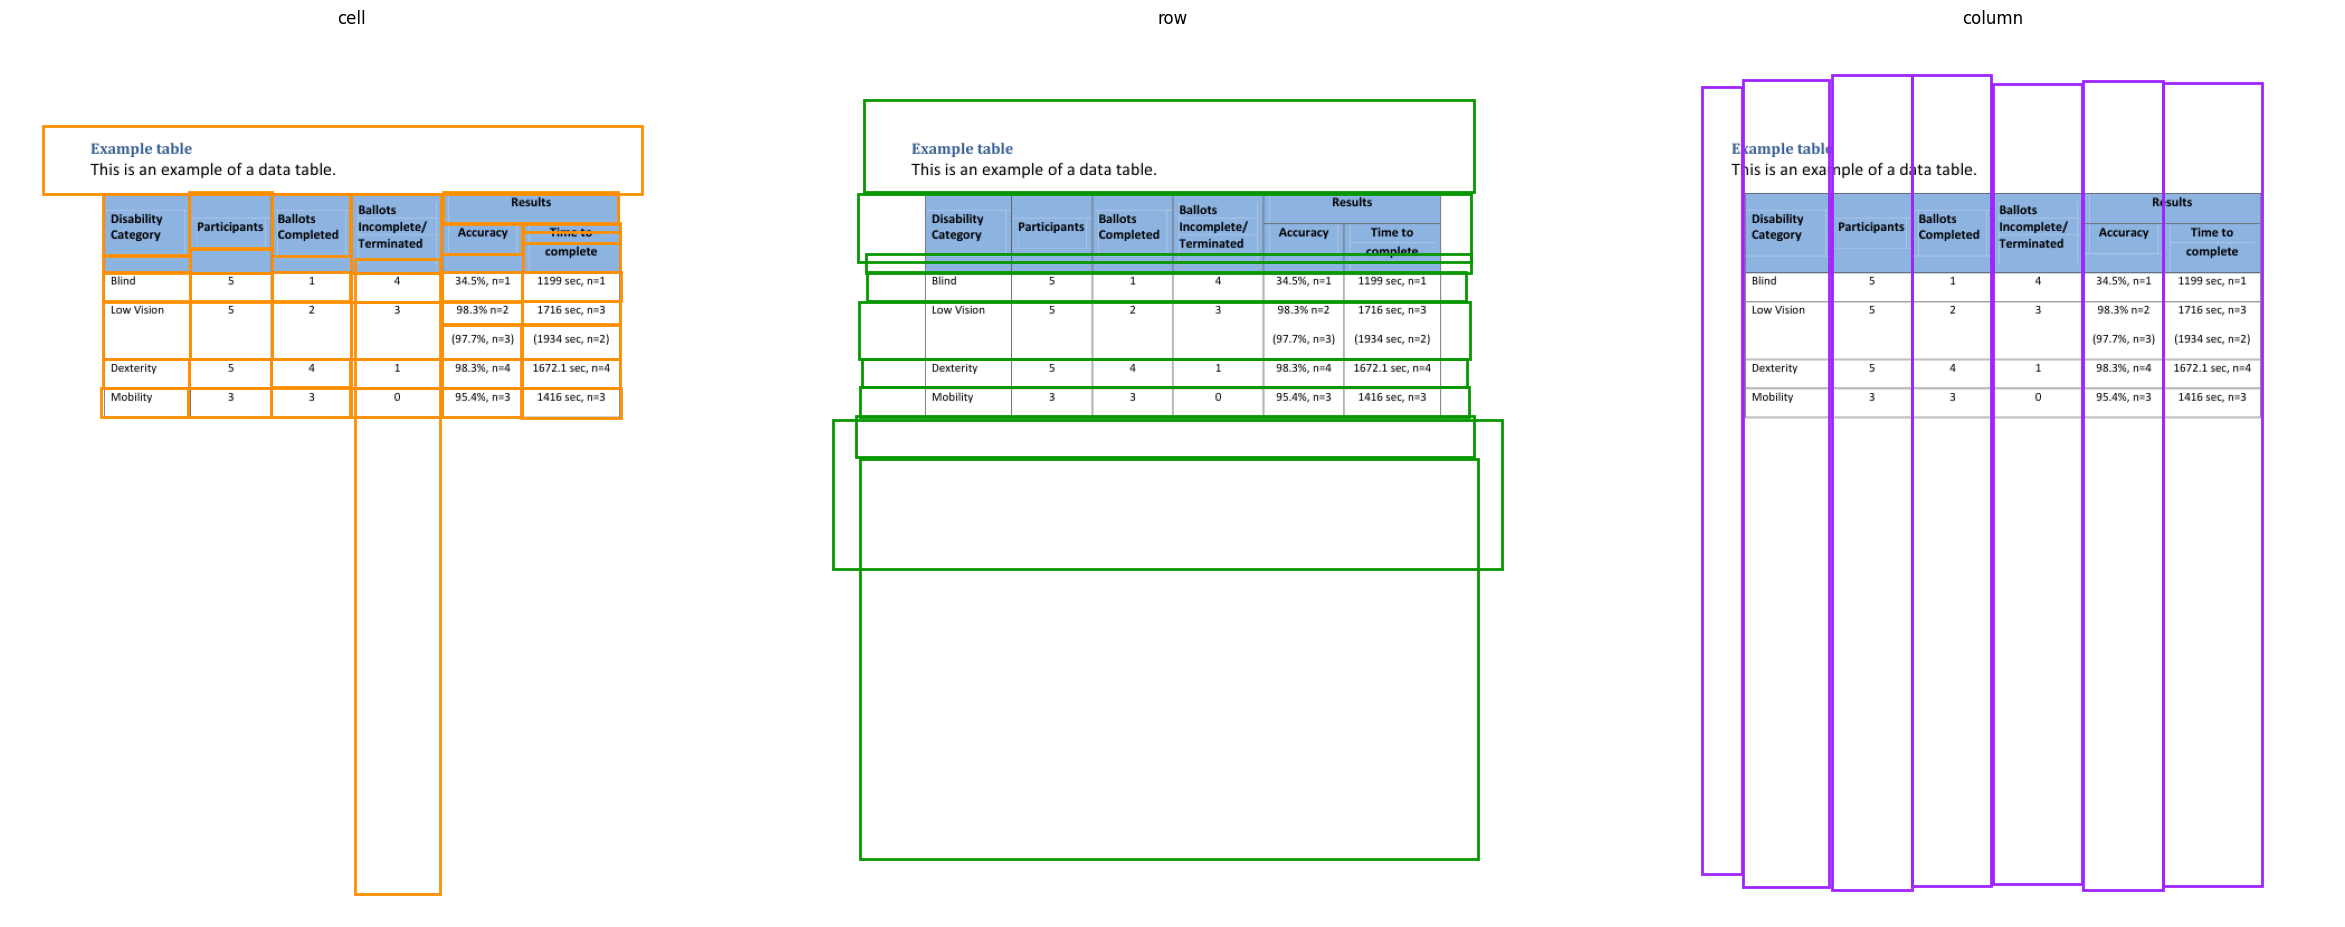

In [18]:
plt.figure(figsize=(30, 15))
for i in range(1, 4):
    boxes_plot_c = [b if j == i else [] for j, b in enumerate(boxes_plot)]
    confs_c = [c if j == i else [] for j, c in enumerate(confs)]

    plt.subplot(1, 3, i)
    plt.title(model.labels[i])
    plot_sample(img, boxes_plot_c, confs_c, labels=model.labels, show_text=False)
plt.show()

In [9]:
from PIL import Image
import numpy as np

In [11]:
img__ = Image.open("example__.jpg").convert("RGB")
img_ = np.array(img__)
img_

array([[[255, 255, 255],
        [250, 250, 250],
        [245, 245, 245],
        ...,
        [249, 249, 249],
        [254, 254, 254],
        [255, 255, 255]],

       [[251, 251, 251],
        [243, 243, 243],
        [238, 238, 238],
        ...,
        [242, 242, 242],
        [248, 248, 248],
        [253, 253, 253]],

       [[245, 245, 245],
        [238, 238, 238],
        [233, 233, 233],
        ...,
        [237, 237, 237],
        [244, 244, 244],
        [249, 249, 249]],

       ...,

       [[244, 244, 244],
        [228, 228, 228],
        [224, 224, 224],
        ...,
        [225, 225, 225],
        [238, 238, 238],
        [253, 253, 253]],

       [[244, 244, 244],
        [228, 228, 228],
        [224, 224, 224],
        ...,
        [225, 225, 225],
        [238, 238, 238],
        [253, 253, 253]],

       [[244, 244, 244],
        [228, 228, 228],
        [224, 224, 224],
        ...,
        [225, 225, 225],
        [238, 238, 238],
        [253, 253, 253]]

In [12]:
with torch.inference_mode():
    x = model.preprocess(img_)
    preds = model(x, img_.shape)[0]
    
boxes, labels, scores = postprocess_preds_table_structure(preds, model.threshold, model.labels)
boxes, labels, scores

(array([[0.00953159, 0.04860714, 0.9669984 , 0.08531585],
        [0.00369544, 0.08449254, 0.07498088, 0.14979914],
        [0.07690022, 0.08457193, 0.12459823, 0.15001634],
        [0.12426225, 0.08453545, 0.25029358, 0.1502941 ],
        [0.24697378, 0.08486435, 0.5065304 , 0.15030916],
        [0.50572526, 0.08446029, 0.5897065 , 0.14980884],
        [0.58903354, 0.0845397 , 0.6904801 , 0.1494362 ],
        [0.69229054, 0.08513474, 0.99018544, 0.15072702],
        [0.00348887, 0.1499127 , 0.07594072, 0.1758498 ],
        [0.07615499, 0.14967291, 0.12414981, 0.17510507],
        [0.12306798, 0.14939362, 0.25046209, 0.17579183],
        [0.24471413, 0.14966367, 0.506698  , 0.17473312],
        [0.5072165 , 0.15036988, 0.58988875, 0.17534833],
        [0.5908913 , 0.14968017, 0.69078636, 0.17547043],
        [0.69278914, 0.14927685, 0.985887  , 0.17599545],
        [0.00365686, 0.1695331 , 0.075439  , 0.25632522],
        [0.00317656, 0.17488359, 0.07587866, 0.19548786],
        [0.075

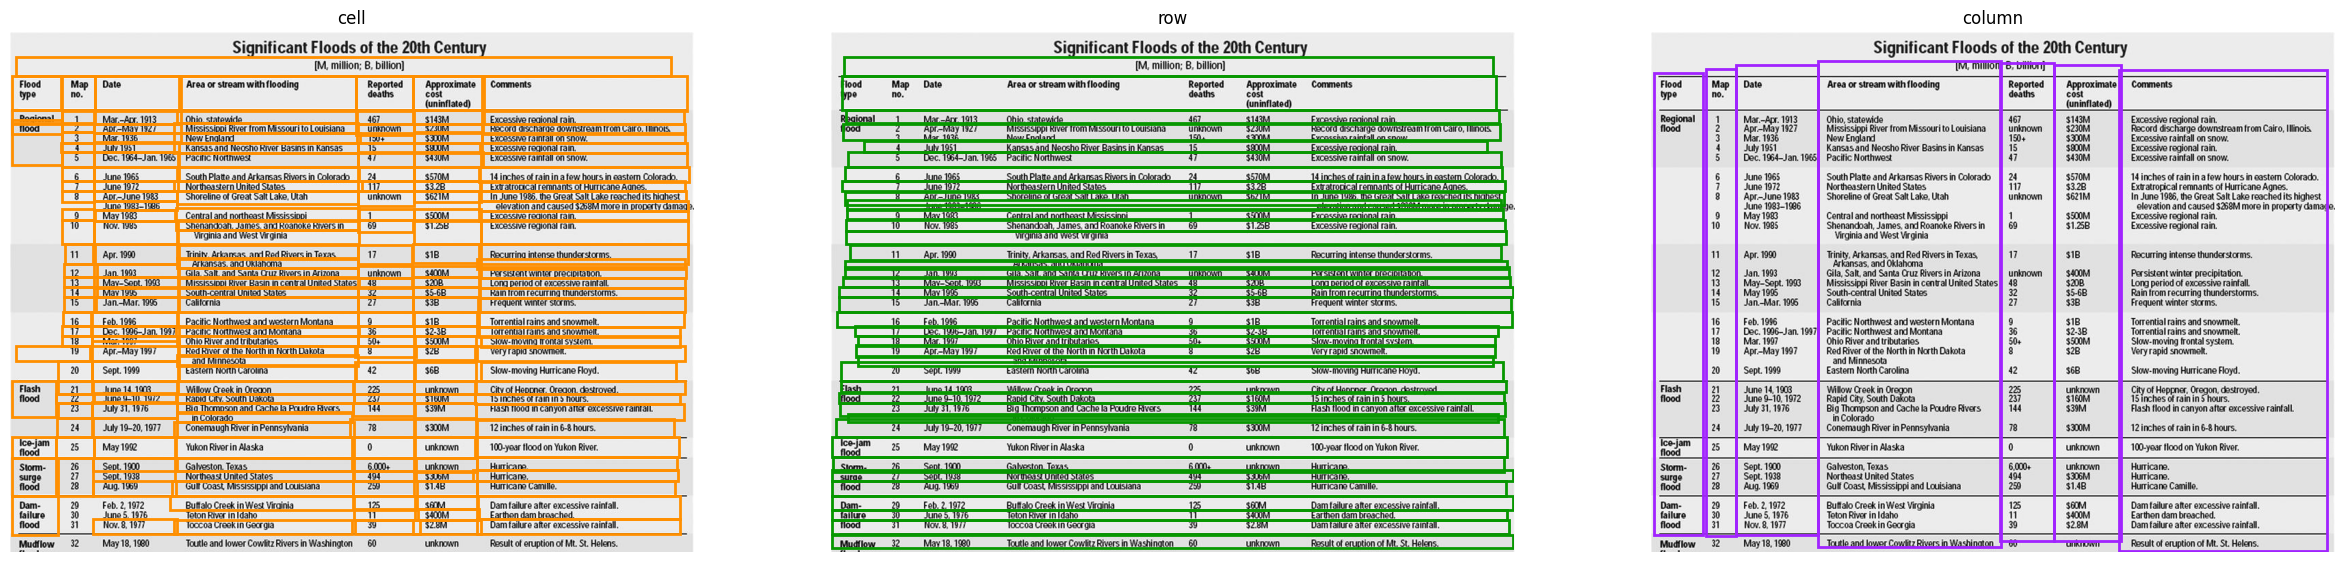

In [15]:
boxes_plot, confs = reformat_for_plotting(boxes, labels, scores, img_.shape, model.num_classes)

plt.figure(figsize=(30, 15))
for i in range(1, 4):
    boxes_plot_c = [b if j == i else [] for j, b in enumerate(boxes_plot)]
    confs_c = [c if j == i else [] for j, c in enumerate(confs)]

    plt.subplot(1, 3, i)
    plt.title(model.labels[i])
    plot_sample(img_, boxes_plot_c, confs_c, labels=model.labels, show_text=False)
plt.show()